# Dimer lifetime analysis

One way to characterize the system is by dimer lifetime. A system in the synchronous phase has a dimer lifetime that is almost as long as the video. On the other hand, an exchange phase must have a short dimer lifetime, and a rupture phase has a zero dimer lifetime. 

In [1]:
import lammps2d as lmp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anm
import matplotlib.collections as clt
import pandas as pd
import string as st
import scipy.spatial as spp

from IPython.display import HTML

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [121]:
radius = 1.4 #um
frequency = 6 #Hz
angle = 27 #degrees
region, initial_positions = lmp.initial_setup(n_of_particles = 150, packing=0.3, height = 4.4)

sim = lmp.sim(initial_positions,
          magnitude = 7.28,
          file_name = "periodic_system_explore",
          dir_name = "PeriodicB",
          radius = radius,
          diffusion = 0.14,
          frequency=frequency,
          susceptibility = 0.4,
          angle=angle,
          framerate=3e1,
          timestep=1e-4,
          total_time = 10,
          temperature = 300,
          stamp_time = False,
          space = {'region':region,'boundary':['p','p','f'],'walls':[False,False,True]})

sim.generate_scripts()
sim.run()

In [131]:
HTML(lmp.display_animation_direct(sim))

How do I analyze the dimers? I first need to be able to tell, from a static frame, which particles form dimers, and with what other particle.

In [122]:
trj = sim.load(read_trj=True)

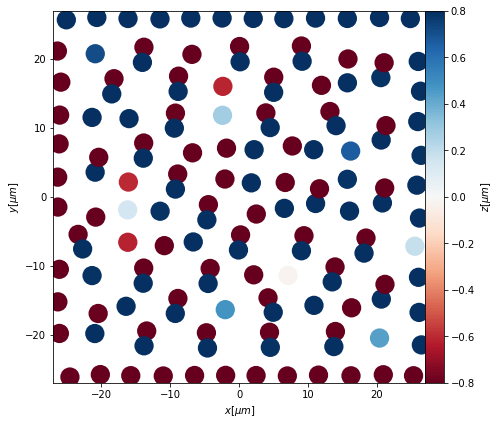

In [134]:
lmp.draw_trj(trj,sim,3)

In [124]:
dim = lmp.dimers(trj,sim)
dim.head()

members
frame id           
666   0.0  {137, 5}
      1.0  {136, 4}
      2.0  {40, 41}
      3.0  {18, 19}
      4.0  {3, 135}

## Dimer lifetime

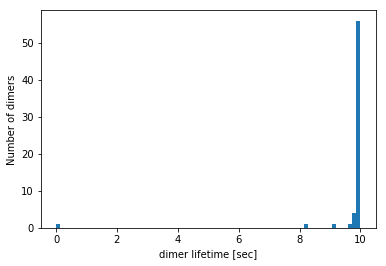

In [152]:
bins = np.arange(len(trj.index.get_level_values('frame').unique().values))/sim.run_parameters.framerate
plt.hist(dim.groupby('id').size()/sim.run_parameters.framerate,bins=bins[::4]);
plt.xlabel("dimer lifetime [sec]");
plt.ylabel("Number of dimers");

There are a lot of dimers with zero time, because in the initial state, particles in the boundaries register as dimers. 

In [153]:
radius = 1.4 #um
frequency = 90 #Hz
angle = 27 #degrees
region, initial_positions = lmp.initial_setup(n_of_particles = 150, packing=0.3, height = 4.4)

sim = lmp.sim(initial_positions,
          magnitude = 7.28,
          file_name = "periodic_system_explore",
          dir_name = "PeriodicB",
          radius = radius,
          diffusion = 0.14,
          frequency=frequency,
          susceptibility = 0.4,
          angle=angle,
          framerate=3e1,
          timestep=1e-4,
          total_time = 10,
          temperature = 300,
          stamp_time = False,
          space = {'region':region,'boundary':['p','p','f'],'walls':[False,False,True]})

sim.generate_scripts()
sim.run()

In [154]:
HTML(lmp.display_animation_direct(sim))

In [155]:
trj = sim.load(read_trj=True)
dim = lmp.dimers(trj,sim)

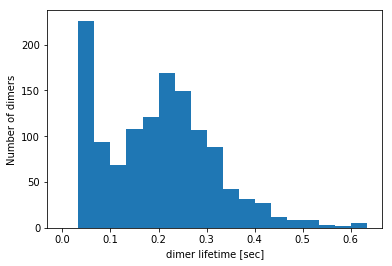

In [156]:
bins = np.arange(len(trj.index.get_level_values('frame').unique().values))/sim.run_parameters.framerate
plt.hist(dim.groupby('id').size()/sim.run_parameters.framerate,bins=bins[0:20])
plt.xlabel("dimer lifetime [sec]")
plt.ylabel("Number of dimers")

# Dimer Lifetime as a function of frequency

In [184]:
radius = 1.4 #um
angle = 27 #degrees
region, initial_positions = lmp.initial_setup(n_of_particles = 150, packing=0.3, height = 4.4)

frequencies = np.arange(0,11,0.2)**2
median_lifetime = -1*np.ones(np.shape(frequencies))

for i,f in enumerate(frequencies):
    sim = lmp.sim(initial_positions,
              magnitude = 7.28,
              file_name = "dimer_lifetime",
              dir_name = "Lifetime",
              radius = radius,
              diffusion = 0.14,
              frequency=f,
              susceptibility = 0.4,
              angle=angle,
              framerate=1e2,
              timestep=1e-4,
              total_time = 5,
              temperature = 300,
              stamp_time = False,
              space = {'region':region,'boundary':['p','p','f'],'walls':[False,False,True]})

    sim.generate_scripts()
    sim.run()

    trj = sim.load(read_trj=True)
    dim = lmp.dimers(trj,sim)

    median_lifetime[i] = dim.groupby('id').size().median()/sim.run_parameters.framerate

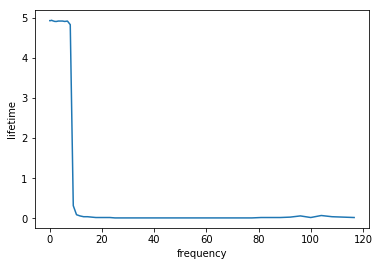

In [183]:
plt.plot(frequencies,median_lifetime)
plt.xlabel("frequency");
plt.ylabel("lifetime");

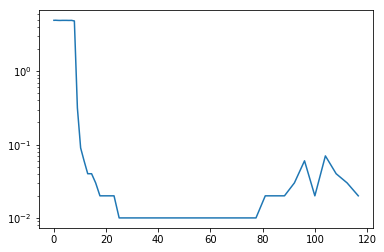

In [180]:
plt.semilogy(frequencies,median_lifetime)
plt.xlabel("frequency");
plt.ylabel("lifetime");

In [181]:
median_lifetime

array([ 4.93 ,  4.93 ,  4.93 ,  4.93 ,  4.94 ,  4.93 ,  4.92 ,  4.91 ,
        4.91 ,  4.92 ,  4.92 ,  4.92 ,  4.91 ,  4.92 ,  4.83 ,  0.315,
        0.09 ,  0.06 ,  0.04 ,  0.04 ,  0.03 ,  0.02 ,  0.02 ,  0.02 ,
        0.02 ,  0.01 ,  0.01 ,  0.01 ,  0.01 ,  0.01 ,  0.01 ,  0.01 ,
        0.01 ,  0.01 ,  0.01 ,  0.01 ,  0.01 ,  0.01 ,  0.01 ,  0.01 ,
        0.01 ,  0.01 ,  0.01 ,  0.01 ,  0.01 ,  0.02 ,  0.02 ,  0.02 ,
        0.03 ,  0.06 ,  0.02 ,  0.07 ,  0.04 ,  0.03 ,  0.02 ])